In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

In [67]:

# Read the CSV file
df_stock = pd.read_csv('../Data/MSFT_historical_data_yfinance.csv')
df_stock['Date'] = pd.to_datetime(df_stock['Date'])
df_stock.set_index('Date', inplace=True)
df_stock.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-12-07,368.230011,371.450012,366.320007,370.950012,23118900
2023-12-08,369.200012,374.459991,368.230011,374.230011,20144800
2023-12-11,368.480011,371.600006,366.100006,371.299988,27708800
2023-12-12,370.850006,374.420013,370.459991,374.380005,24793900
2023-12-13,376.019989,377.636108,375.079987,375.880188,4696314


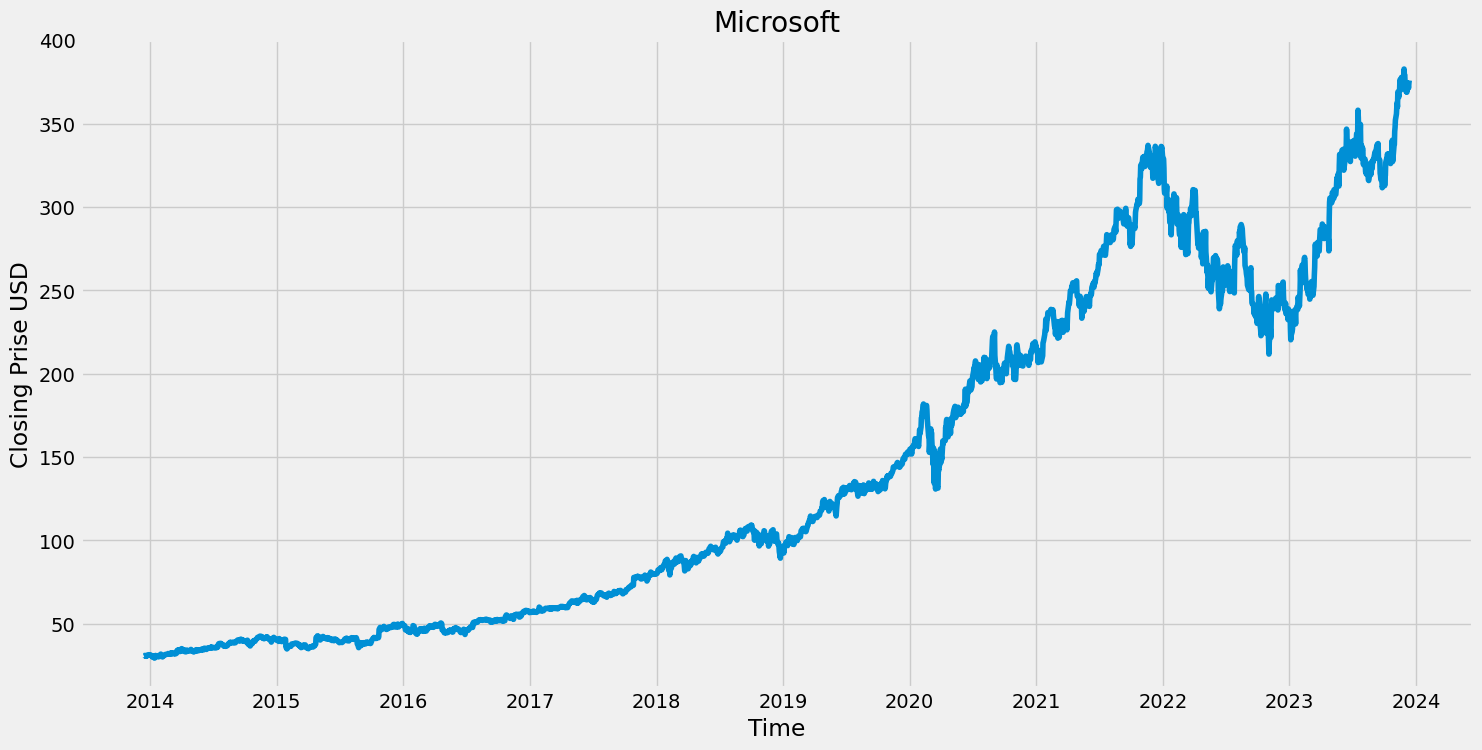

In [68]:
#Visualizing the closing prices of the stock

plt.figure(figsize=(16,8))
plt.title('Microsoft')
plt.xlabel('Time')
plt.ylabel('Closing Prise USD')
plt.plot(df_stock['Close'])
plt.show()

In [69]:
# Predicting 20% days into the future.
future_days = math.ceil(df_stock.shape[0]*0.2)
df_prediction = df_stock[['Open','High','Low','Close']]
df_prediction = pd.DataFrame(df_prediction)
df_prediction['Prediction'] = df_prediction['Close'].shift(-future_days)

X = np.array(df_prediction.drop(['Prediction'], axis=1))[:-future_days]
print(X)
y = np.array(df_prediction['Prediction'])[:-future_days]
print(y)

[[ 31.50976254  31.53502643  30.83611778  30.89506149]
 [ 30.9287324   31.15608803  30.76874284  31.0634613 ]
 [ 31.10556186  31.24871312  30.59191016  30.75189972]
 ...
 [329.27760522 329.46418943 324.84873276 328.94372559]
 [328.39376021 330.43632654 326.14495034 327.10733032]
 [328.95348406 336.82918781 328.7668999  336.37747192]]
[ 49.05435181  49.88082123  49.49868774 ... 371.29998779 374.38000488
 375.88018799]


In [70]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

x_future = df_prediction.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[146.13569686, 147.86061712, 145.52861492, 147.66789246],
       [147.43661525, 149.2578905 , 147.27279855, 148.91098022],
       [149.46990755, 150.23117518, 149.19045897, 149.87463379],
       ...,
       [329.27760522, 329.46418943, 324.84873276, 328.94372559],
       [328.39376021, 330.43632654, 326.14495034, 327.10733032],
       [328.95348406, 336.82918781, 328.7668999 , 336.37747192]])

In [71]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[333.29403687 303.38937378 319.05490112 319.05490112 317.97467041
 319.05490112 321.40188599 327.20556641 328.66876221 336.28918457
 310.68817139 335.79815674 333.2154541  330.26940918 328.72766113
 323.09094238 310.68817139 330.26940918 308.39025879 308.61611938
 309.31332397 312.54415894 283.29989624 304.61935425 297.20516968
 297.87289429 296.17404175 290.70425415 291.03811646 283.29989624
 291.37203979 294.44564819 302.7142334  305.38531494 303.20523071
 307.82064819 295.83035278 300.43597412 295.5357666  299.08081055
 305.6111145  256.39160156 289.7321167  289.69274902 295.06436157
 294.72000122 270.82699585 283.33459473 283.12799072 275.79684448
 289.88833618 308.85073853 294.02130127 290.24258423 295.3989563
 291.19711304 285.23379517 274.45855713 304.48165894 283.89553833
 281.03198242 275.60009766 272.02798462 293.6335144  289.6914978
 290.50827026 295.63510132 294.38540649 299.20721436 294.71011353
 299.24658203 298.83322144 305.74121094 304.48165894 308.85073853
 303.3893737

In [72]:
predictions = tree_prediction
valid = df_prediction[X.shape[0]:]
valid['Predictions'] = predictions

/tmp/ipykernel_343042/1820238457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

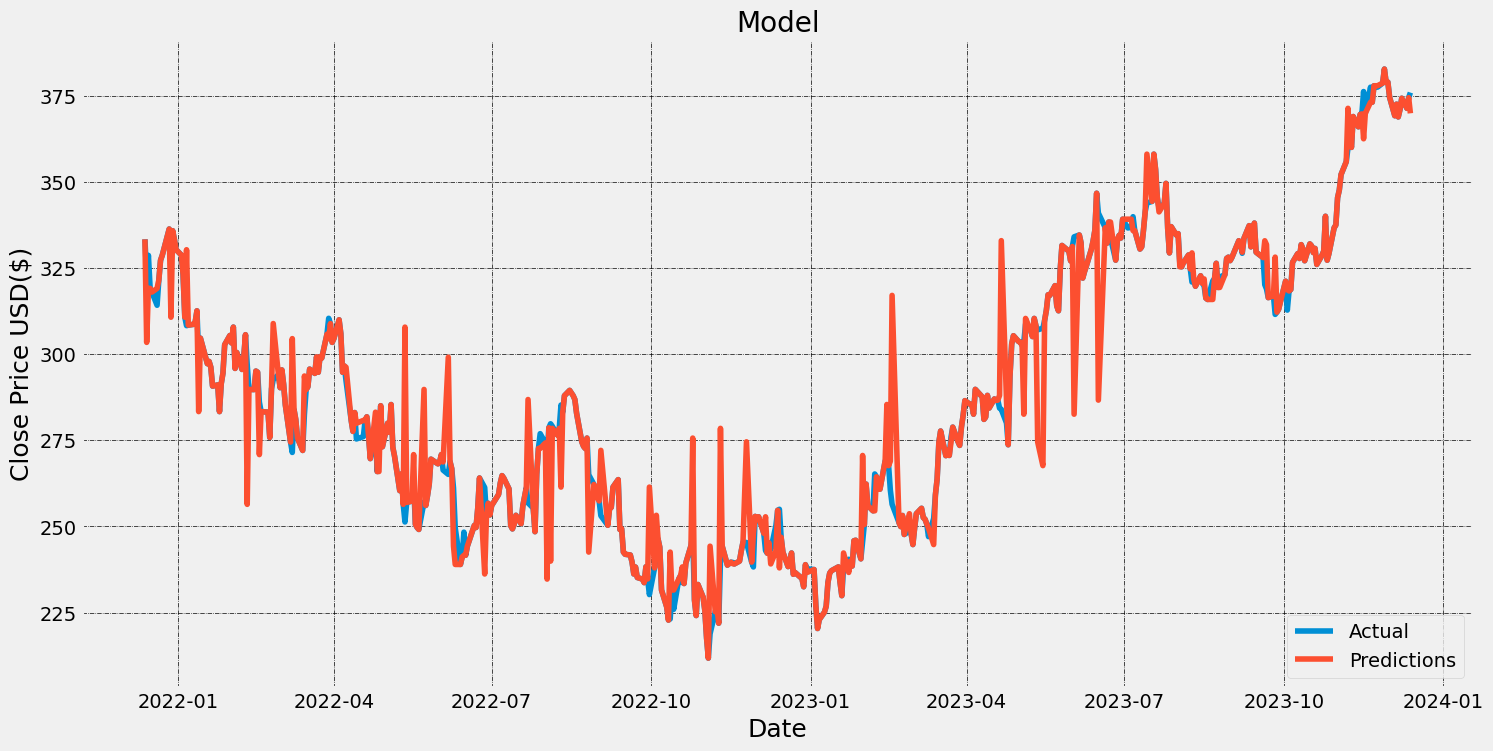

In [73]:
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize = 18)
# plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.grid(which='major',color='k', linestyle='-.',linewidth=0.5)
plt.legend(['Actual', 'Predictions'], loc = 'lower right')
plt.show

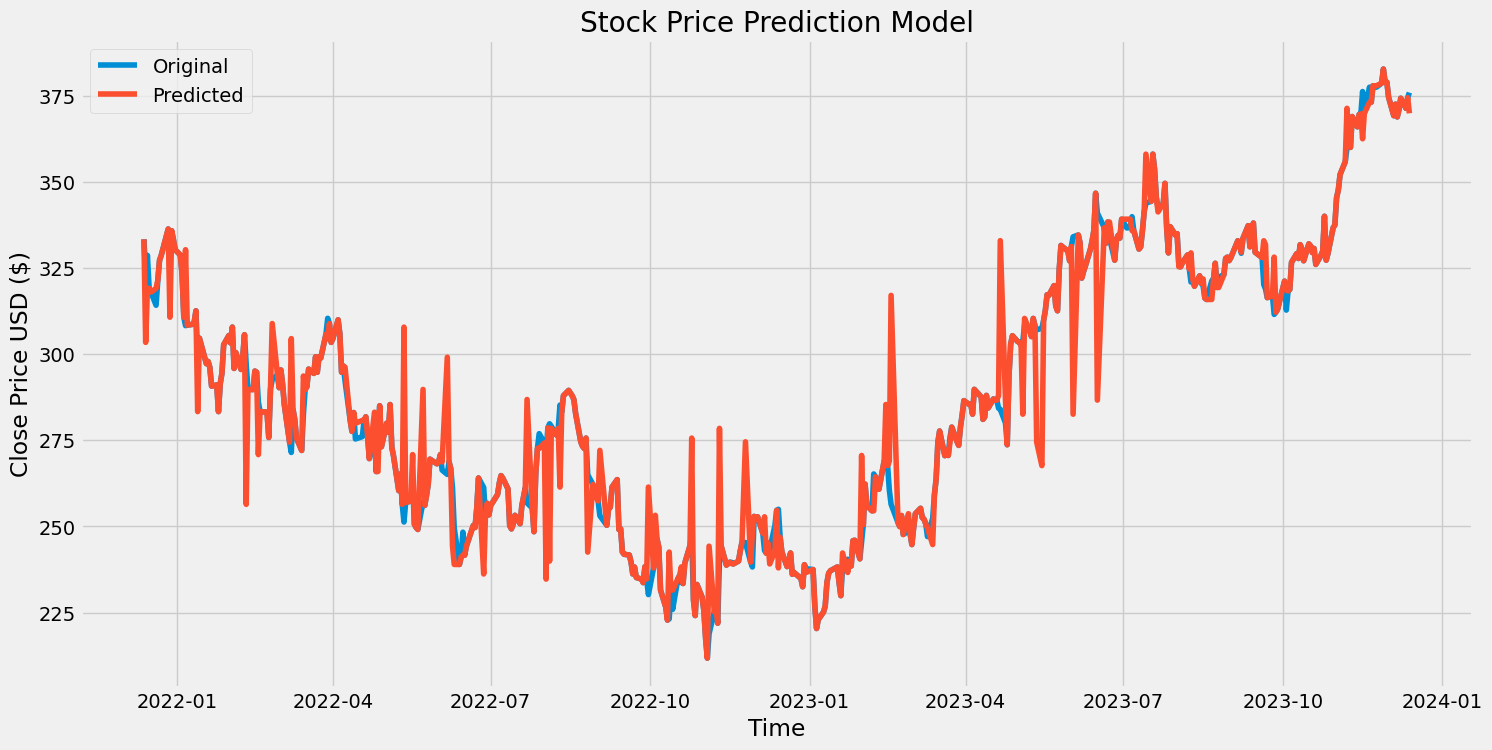

In [74]:
df_prediction = df_prediction[df_prediction.index >= '2022-06-01'] 


plt.figure(figsize=(16,8))
plt.title("Stock Price Prediction Model")
plt.xlabel('Time')
plt.ylabel('Close Price USD ($)')
# plt.plot(df_prediction['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", 'Predicted'])
plt.show()

The decision tree algorithm is quite popular for the interpretability and ease of use. However, one can see that there are limitations: We see spikes going down that might occur when using decision tree algorithms for stock market predition. One reason can be that decision trees are sensitive to outliers in the data. The decison tree may create splits or branches to accommodate these outliers. s
Moreover, decision trees have a tendency to overfit the training data, capturing specific patterns that might not generalize well to unseen data. Overfitting can lead to spikes in predictions as the model tries to fit the training data too closely.